In [1]:
import plotly
import plotly.express as px
plotly.__version__

ModuleNotFoundError: No module named 'plotly.express'

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


* 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [ ]:
counts = churn_data['Exited'].value_counts()
counts

Exited
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
fig = px.bar(
    counts,
    #y=counts.index,
    #y='count'
)
fig.show()

Колличество лояльных клиентов банка в 3,9 раза превышает колличество ушедших клиентов.

* 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [ ]:
mask = churn_data['Balance'] > 25000
maskBalance = churn_data[mask]

In [ ]:
fig = px.histogram(
    churn_data[mask],
    x='Balance',
    labels={'Balance':'Баланс на счету клиента, $',
            'y' :'Количество клиентов, чел.'},
    marginal='box',
    #nbins=30,
    )
fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Histogram(x=maskBalance['Balance'])])

fig.update_layout(
    title='Распределение баланса', 
    template='plotly_white',
    yaxis=dict(
        title=dict(text="Количество клиентов"),
        side="left",
        range=[0, 200],
    ),
    yaxis2=dict(
        overlaying="y",
        visible=False
    ),
    #width=700,
    xaxis = dict(
        title=dict(text="Баланс")
    )
)


Значительное количество клиентов имеет баланс от 100к до 140к

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [ ]:
churn_data
fig = px.box(
    data_frame=churn_data,
    x = 'Exited',
    y = 'Balance',
    color= 'Exited'
)
fig.show()

Ушедшие клиенты в основном имели балланс более 37к, следоватально, их могли не устроить условия при баласне выше этой суммы.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [ ]:
#balance_exited= churn_data.groupby('Age')['Exited']

#display(balance_exited.head())

fig = px.box(
    data_frame=churn_data,
    x = 'Exited',
    y = 'Age',
    color= 'Exited'
)
fig.show()


В потенциальной группе выбросов люди в возрасте от 38 до 51. На них банку стоит обратить свое внимание.

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [ ]:
import seaborn as sns

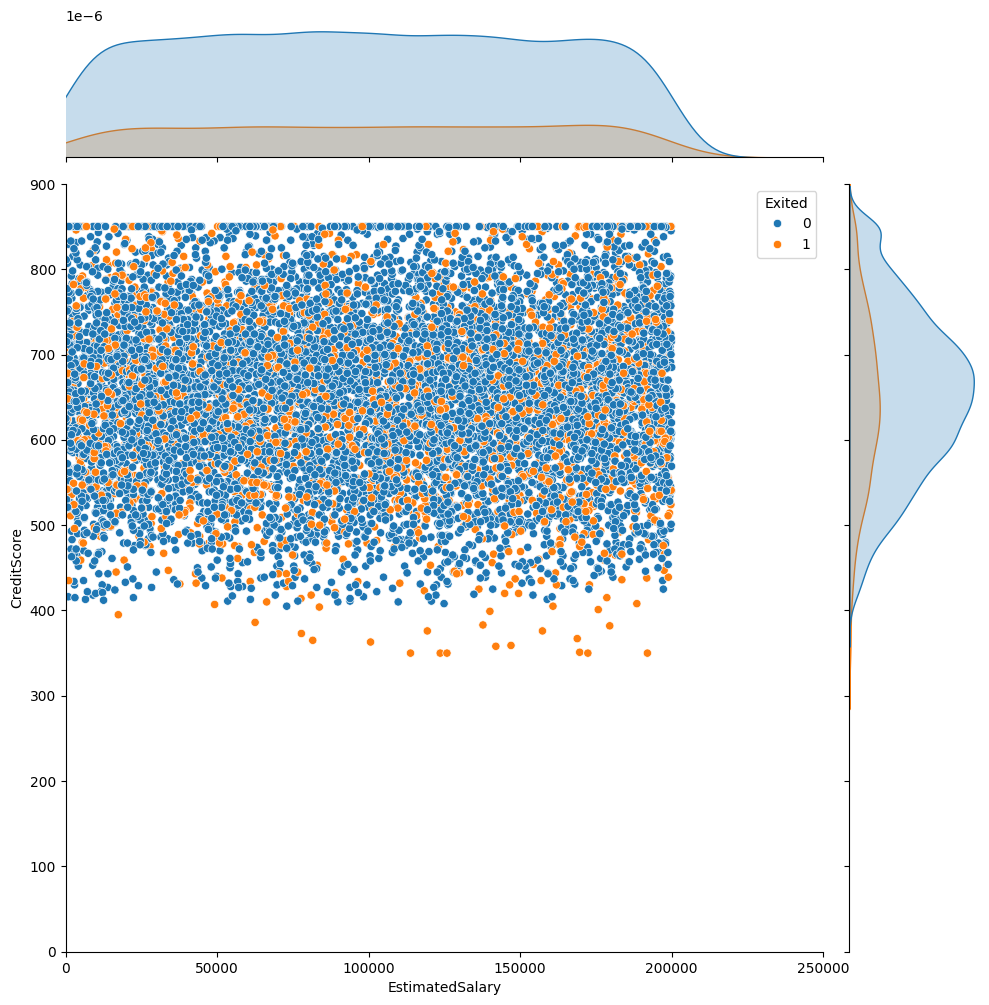

In [ ]:
jointplot = sns.jointplot(
    data = churn_data, 
    x = 'EstimatedSalary', 
    y = 'CreditScore',
    hue = 'Exited',
    xlim = (0, 250000),
    ylim = (0, 900),
    height = 10,
)
plt.show()

Явной взаимосвязи редитного рейтинга клиента и его предполагаемой зарплаты не наблюдается.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

In [ ]:
gender = churn_data.groupby('Gender')['Exited'].mean()
gender



Gender
Female    0.250715
Male      0.164559
Name: Exited, dtype: float64

In [ ]:
fig = px.bar(
    data_frame=gender,
    x=gender.index,
    y='Exited',
    color=gender.index,
    title='Доли ушедших клиентов в разрезе пола'
)
fig.show()

Доля ушедших женщин выше, чем мужчин.

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [ ]:
loyality = churn_data.groupby(['NumOfProducts','Exited'])['Exited'].count().unstack()
display(loyality)

Exited,0,1
NumOfProducts,,
1,3675.0,1409.0
2,4242.0,348.0
3,46.0,220.0
4,NaN,60.0


In [ ]:
fig = px.bar(
    loyality,
    barmode='group'  
)
fig.show()

In [ ]:
pivot_loyality = churn_data.pivot_table(
    values='CustomerId', 
    index='NumOfProducts',
    columns='Exited',
    aggfunc='count',
    fill_value=0
)
display(pivot_loyality)


Exited,0,1
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60


In [ ]:
fig = px.bar(
    pivot_loyality,
    x=pivot_loyality.index,
    y=[0,1],
    barmode='group',
)
fig.show()

При абсолютном сравнении отток клиентов больше в группе с одним приобретенным продуктом. Однако в относительном сравнении отток клиентов в группе с числом приобретенных продуктов 3 или 4 больше, чем число оставшихся клиентов.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [ ]:
status = churn_data.groupby(['IsActiveMember','Exited'])['Exited'].count().unstack()
display(status)

Exited,0,1
IsActiveMember,,
0,3547,1302
1,4416,735


In [ ]:
fig = px.bar(
    status,
    barmode='group'  
)
fig.show()

Среди активных клиентов количество оставшихся клиентов в 2.7 раза больше, чем тех кто остался. Среди неактивных клиентов оставшихся клиентов в 6 раз больше ушедших

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [ ]:
status = churn_data.groupby(['Geography','Exited'])['Exited'].count().unstack()
display(status)

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [ ]:
pivot = churn_data.pivot_table(
    values='Exited',
    index='Geography',
    aggfunc= 'mean',
)
pivot

,Exited
Geography,
France,0.161548
Germany,0.324432
Spain,0.166734


In [ ]:
status2 = churn_data.groupby(['Geography'])['Exited'].mean()
display(status2)

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64

In [ ]:
fig = px.choropleth(
    data_frame=status2, #DataFrame
    locations=status2.index , #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет
    #animation_frame="date", #анимационный бегунок
    range_color=[0, 0.35], #диапазон цвета
    #title='Global Spread of COVID-19', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show()


В Германии доля ушедших клиентов больше. Это может быть связано с самым низкик числом клиентов среди сравниваемых стран.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.


In [ ]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
display(churn_data)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreCat
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Good
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Poor
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Good
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Good


In [ ]:
pivot_10 = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc= 'mean',
)
pivot_10

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


In [ ]:

fig = px.imshow(
    pivot_10,
    text_auto = True,
    title = 'Тепловая карта распределения среднего значения оттока клиентов',
    )
fig.show()

Чаще всего уходят клиетны которые пользуются услугами банка меньше 1 года с кредитным рейтингом от 300 до 500